In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds = pd.read_csv('wineData.txt', sep=',', header=None)
df = pd.DataFrame(ds)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### Variables :
* Class : Class Category of the Wine ( Class - 1 / 2 / 3)
* Alcohol: Amount of Alcholol in that perticular wine type
* Malic acid : Amount of Malic Acid in that perticular wine type
* Ash : Amount of Ash in that perticular wine type
* Alcalinity of ash : Amount of Alcalinity of Ash in that perticular wine type
* Magnesium : Amount of Magnesium in that perticular wine type
* Total phenols : Amount of phenol in that perticular wine type
* Flavanoids : Amount of Flavanoids in that perticular wine type
* Nonflavanoid phenols : Amount of Nonflavanoid phenols in that perticular wine type
* Proanthocyanins : Amount of Proanthocyanins in that perticular wine type
* Color intensity : Amount of Color intensity for that perticular wine type
* Hue : Amount of Hue for that perticular wine type
* OD280/OD315 of diluted wines : Amount of diluted in that perticular wine type
* Proline : Amount of Proline in that perticular wine type


 https://rpubs.com/Kanasani/724932

In [3]:
#Nombramos las columnas según la información que contienen las variables.
df.columns=['Class','Alcohol','Malic acid','Ash', 'Alcalinity of ash','Magnesium','Total phenols', 'Flavanoids',
            'Nonflavanoid phenols','Proanthocyanins', 'Color intensity','Hue','OD280/OD315 of diluted wines',
            'Proline']
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


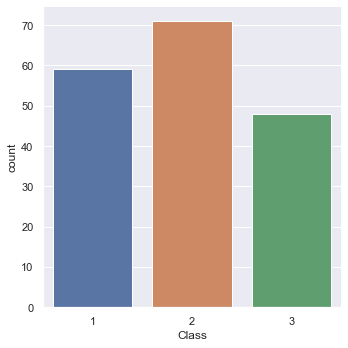

In [88]:
sns.factorplot('Class',data=df,kind="count");


En este gráfico de barras podemos observar la cantidad de registros por cada categoría.Siendo la categoría 2 la que más registros presenta. 


In [4]:
df.shape

(178, 14)

In [7]:
df.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


Aquí podemos observar la estadísticas descriptivas incluyendo: media, meadiana, máx, mín, std y conteos. 

<Figure size 432x288 with 0 Axes>

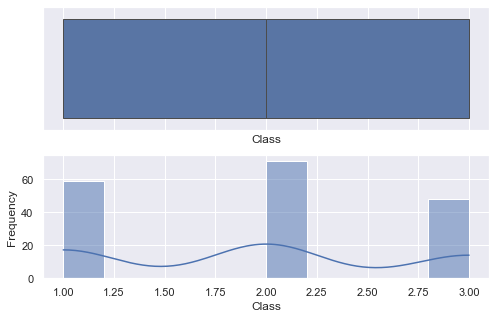

<Figure size 576x360 with 0 Axes>

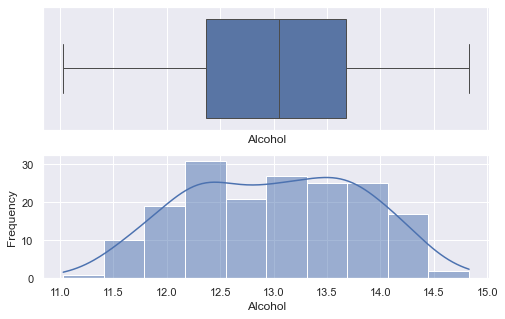

<Figure size 576x360 with 0 Axes>

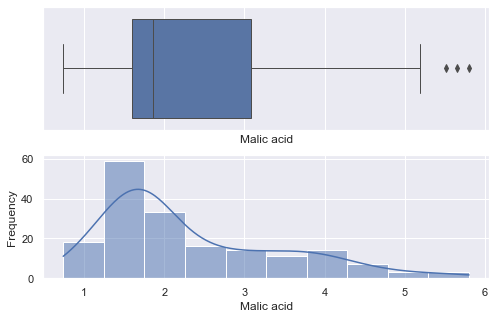

<Figure size 576x360 with 0 Axes>

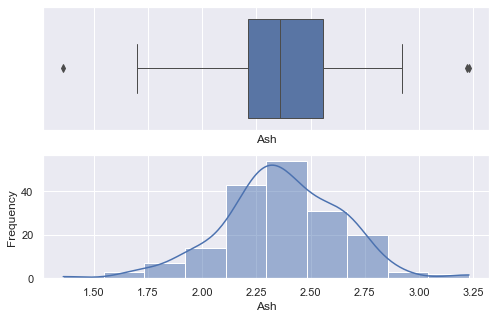

<Figure size 576x360 with 0 Axes>

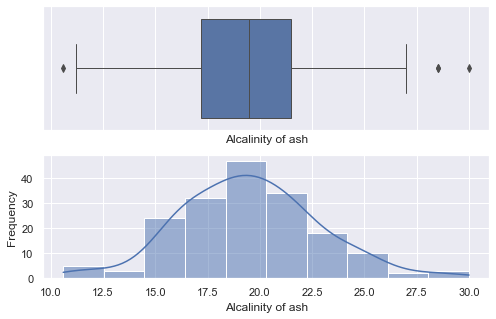

<Figure size 576x360 with 0 Axes>

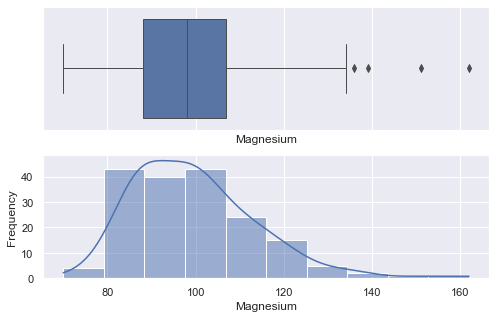

<Figure size 576x360 with 0 Axes>

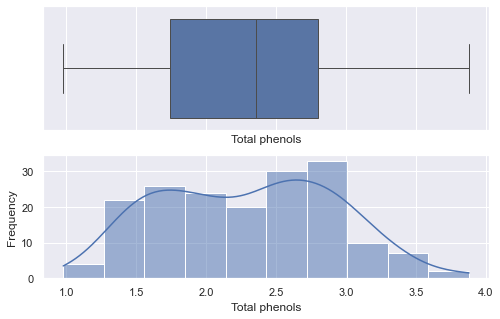

<Figure size 576x360 with 0 Axes>

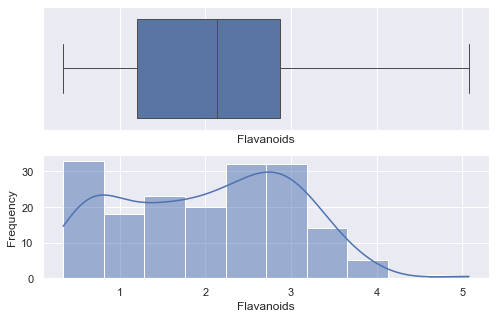

<Figure size 576x360 with 0 Axes>

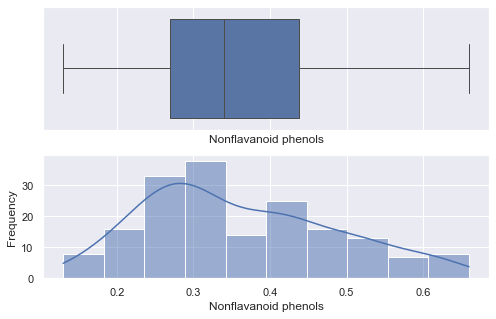

<Figure size 576x360 with 0 Axes>

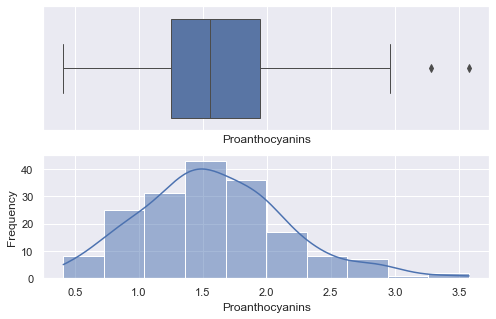

<Figure size 576x360 with 0 Axes>

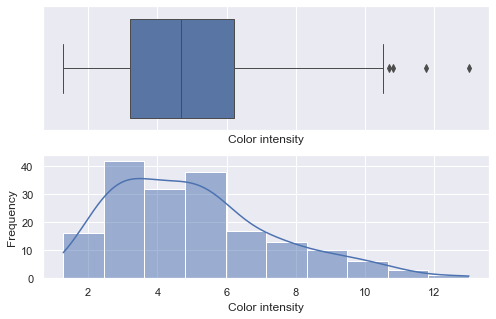

<Figure size 576x360 with 0 Axes>

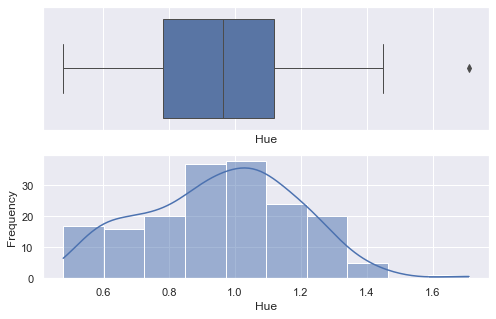

<Figure size 576x360 with 0 Axes>

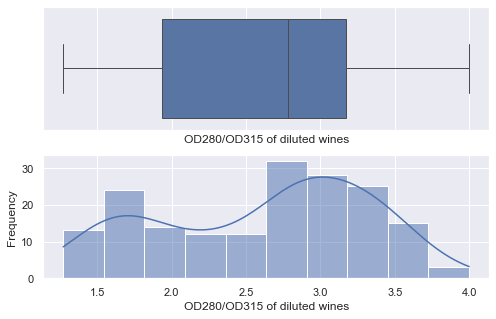

<Figure size 576x360 with 0 Axes>

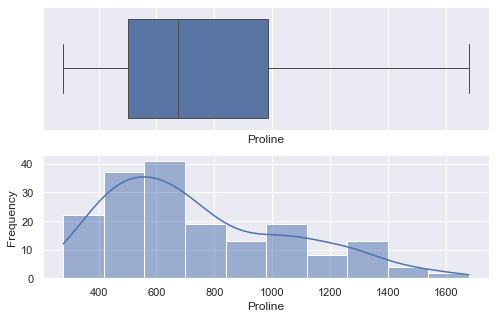

In [12]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

En estos gráficos podemos apreciar si las variables presentan outliers y la distribución de cada varibale. 
Se observa que la única variable con distribución probablemnte gaussiana es 'Alcalinity of ash', esto lo comprobaremos mediante un Test de Hipótesis.

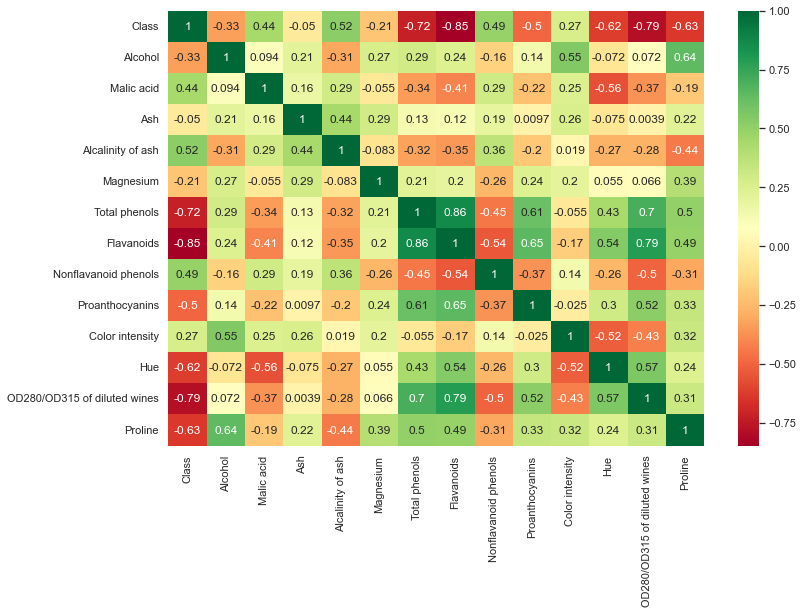

In [13]:
plt.figure(figsize=( 12 , 8 )) 
sns.heatmap(df.corr(), cmap = 'RdYlGn' , annot= True ) 
plt.show()

Se puede observar que algunas de las variables presentan correlación entre ellas, algunas positivas y otras negativas, como son el Total phenols y Flavanoids (0.86). 

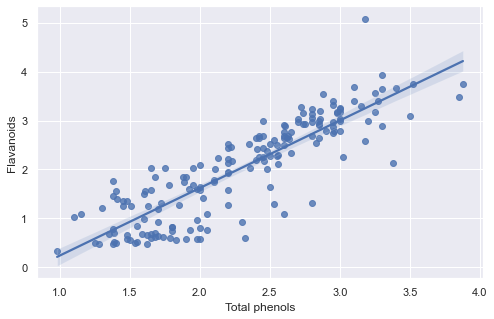

In [14]:
 #Correlación entre sólo dos variables 
sns.regplot(x= 'Total phenols' , y= 'Flavanoids' , data=df) 
plt.show()

Por lo que se puede observar en el gráfico de Heatmap las variables con más correlación entre sí son Total phenols y Flavanoids, en este gráfico podemos observar mejor esa correlación entre las dos variables.

### Preprocesado

In [15]:
df.isnull().values.any()

False

In [16]:
df.isna().values.any()

False

No hay valores nulos ni datos anómalos.

* Analizamos si las variables son normales o no aplicando Shapiro-Wilk Normality Test
* α=0,05
* H0: la muestra tiene una distribución gaussiana.
* H1: la muestra no tiene distribución gaussiana.

In [25]:
from scipy import stats

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print( i, 'tiene un p-value= ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Se acepta la hipotesis nula, probablemente Gaussian.')
    else:
        print('Se rechaza la hipotesis nula, probablemente no Gaussiana.')

Class tiene un p-value=  3.526998097335039e-14
Se rechaza la hipotesis nula, probablemente no Gaussiana.
Alcohol tiene un p-value=  0.02005171775817871
Se rechaza la hipotesis nula, probablemente no Gaussiana.
Malic acid tiene un p-value=  2.9459296113643063e-10
Se rechaza la hipotesis nula, probablemente no Gaussiana.
Ash tiene un p-value=  0.03868526220321655
Se rechaza la hipotesis nula, probablemente no Gaussiana.
Alcalinity of ash tiene un p-value=  0.26386943459510803
Se acepta la hipotesis nula, probablemente Gaussian.
Magnesium tiene un p-value=  6.345416068143095e-07
Se rechaza la hipotesis nula, probablemente no Gaussiana.
Total phenols tiene un p-value=  0.004395752213895321
Se rechaza la hipotesis nula, probablemente no Gaussiana.
Flavanoids tiene un p-value=  1.6790636436780915e-05
Se rechaza la hipotesis nula, probablemente no Gaussiana.
Nonflavanoid phenols tiene un p-value=  0.00010552661115070805
Se rechaza la hipotesis nula, probablemente no Gaussiana.
Proanthocyanins

* Se puede confirmar lo que anticipabamos gráficamente, que sólo una variable es probablemnte Gaussiana : Alcalinity of ash.
* Las demás variables son probablemente no Gaussianas: Alcohol,Malic, Ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline.


In [27]:
#Porcentaje  de  outliers en cada variable
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Class outliers = 0.00%
Column Alcohol outliers = 0.00%
Column Malic acid outliers = 1.69%
Column Ash outliers = 1.69%
Column Alcalinity of ash outliers = 2.25%
Column Magnesium outliers = 2.25%
Column Total phenols outliers = 0.00%
Column Flavanoids outliers = 0.00%
Column Nonflavanoid phenols outliers = 0.00%
Column Proanthocyanins outliers = 1.12%
Column Color intensity outliers = 2.25%
Column Hue outliers = 0.56%
Column OD280/OD315 of diluted wines outliers = 0.00%
Column Proline outliers = 0.00%


* Variables con outliers: Malic acid, Ash, Alcalinity of ash, Magnesium,Proanthocyanins, Color intensity, Hue. 
* Variables sin outliers: Class, Alcohol, Total phenols, Flavanoids, Nonflavanoid phenols, OD280/OD315 of diluted wines,Proline. 

### Target y feactures

In [17]:
#Features
X = df.drop('Class',axis=1)
X.shape

(178, 13)

In [18]:
#Target---> columna "Class": Category of the Wine ( Class - 1 / 2 / 3)
y = df[['Class']]
y.shape

(178, 1)

#### División de los datos en dos grupos , un grupo para capacitación (80%) "Train" y otro grupo para pruebas (20%) "Test". 

In [19]:
#Training And Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.80)

print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (142, 13)
X_test.shape:  (36, 13)
y_train.shape:  (142, 1)
y_test.shape:  (36, 1)


### Transformación (Exercici 5)

In [69]:
from sklearn.preprocessing import StandardScaler

cols_standar = ['Alcalinity of ash']
scaler_std = StandardScaler()
scaler_std.fit(X_train[cols_standar])
X_train[cols_standar] = scaler_std.transform(X_train[cols_standar])
X_test[cols_standar] = scaler_std.transform(X_test[cols_standar])

In [33]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

columnsNorm = ['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines','Proline']
scaler = preprocessing.MinMaxScaler().fit(X_train[columnsNorm])
X_train[columnsNorm] = scaler.transform(X_train[columnsNorm])

columnsRobust = ['Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium','Proanthocyanins', 'Color intensity', 'Hue']
scaler = preprocessing.RobustScaler().fit(X_train[columnsRobust])
X_train[columnsRobust] = scaler.transform(X_train[columnsRobust])

In [34]:
columnsNorm = ['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines','Proline']
scaler = preprocessing.MinMaxScaler().fit(X_test[columnsNorm])
X_test[columnsNorm] = scaler.transform(X_test[columnsNorm])

columnsRobust = ['Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium','Proanthocyanins', 'Color intensity', 'Hue']
scaler = preprocessing.RobustScaler().fit(X_test[columnsRobust])
X_test[columnsRobust] = scaler.transform(X_test[columnsRobust])

## - Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

#### Modelo Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)
dt_classifier.score(X_test, y_test)

0.8055555555555556

Esto significa que, en promedio, el modelo clasifica correctamente el 80.56% de las muestras del conjunto de datos que se utilizaron para entrenar y validar el modelo. 
En general, un resultado de 0.8055555555555556 es un buen punto de partida para evaluar un modelo de árbol de decisión, pero se deben realizar otras pruebas y métricas para obtener una evaluación completa y precisa del modelo

In [40]:
y_DT_pred = dt_classifier.predict(X_test)

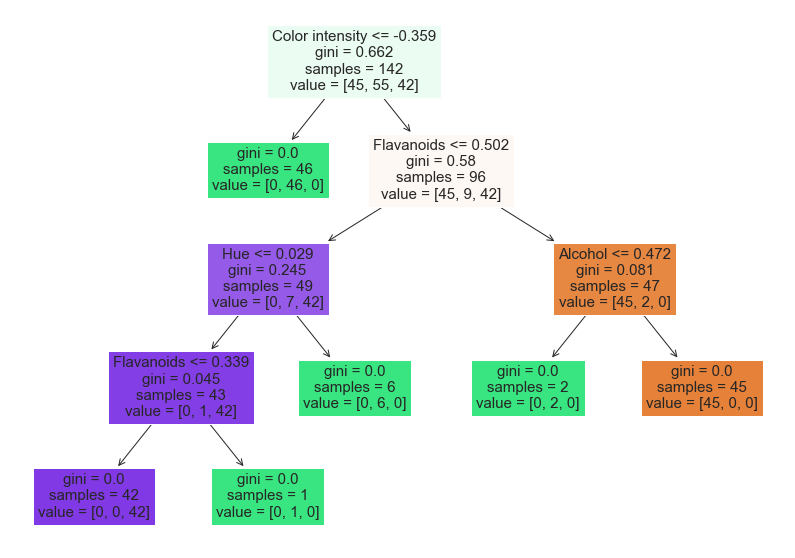

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,10))
plot_tree(decision_tree = dt_classifier, feature_names = X.columns, filled = True);

#### Modelo Nearest Neighbor Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.8888888888888888

Un resultado de 0.8888888888888888 en un modelo (k-NN) indica que el modelo ha logrado una precisión del 88.89% en la predicción de la variable objetivo.Esto significa que, en promedio, el modelo clasifica correctamente el 88.89% de las muestras del conjunto de datos que se utilizaron para entrenar y validar el modelo

In [41]:
y_KNN_pred = knn_classifier.predict(X_test)

#### Support Vector Machines

In [94]:
from sklearn import svm
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9166666666666666

Un resultado de 0.9166666666666666 en el contexto de una tarea de clasificación con Support Vector Machine (SVM) podría ser interpretado como la precisión del modelo. La precisión es una medida de qué tan bien el modelo es capaz de identificar correctamente las instancias positivas y negativas en el conjunto de prueba.

In [95]:
y_pred_svm = clf.predict(X_test)

## - Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

#### Matriz de Confusión 
Es una herramienta que se utiliza en aprendizaje automático para evaluar el rendimiento de un modelo de clasificación. La matriz de confusión es una tabla que muestra el número de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN) para un modelo de clasificación binaria

In [98]:
from sklearn.metrics import confusion_matrix
cf_matrix_dt = confusion_matrix(y_test, y_DT_pred)
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
cf_matrix_KNN = confusion_matrix(y_test, y_KNN_pred)

[Text(0.5, 1.0, 'Confusion matrix for Decision Tree')]

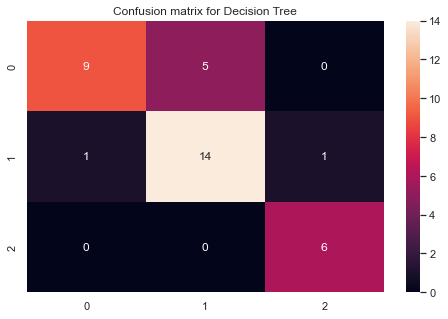

In [99]:
sns.heatmap(cf_matrix_dt, annot=True).set(title='Confusion matrix for Decision Tree')

[Text(0.5, 1.0, 'Confusion matrix for Support Vector Machine')]

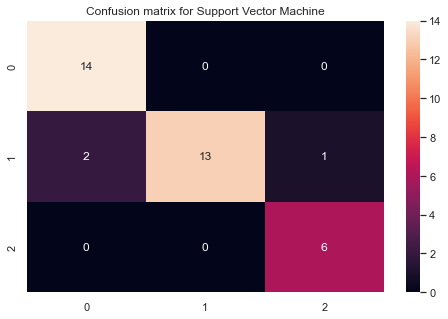

In [100]:
sns.heatmap(cf_matrix_svm, annot=True).set(title='Confusion matrix for Support Vector Machine')

[Text(0.5, 1.0, 'Confusion matrix for Nearest Neighbor Classifier ')]

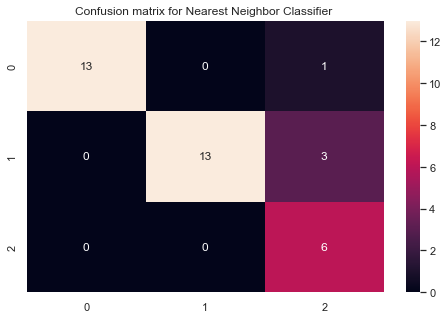

In [101]:
sns.heatmap(cf_matrix_KNN, annot=True).set(title='Confusion matrix for Nearest Neighbor Classifier ')

+ Cada observación en el conjunto de prueba se representa exactamente en un cuadro.
+ Es una matriz de 3x3 porque hay 3 clases de respuestas.

In [96]:
from sklearn import metrics
prediccions = [y_DT_pred,y_KNN_pred,y_pred_svm]
accuracy_model = []

for y_pred in prediccions:
    accuracy=metrics.accuracy_score(y_test, y_pred)
    accuracy_model.append(accuracy)

In [97]:
df_accuracy = pd.DataFrame((accuracy_model), columns=['Accuracy'], index = ['Modelo Dec Tree','Modelo KNN','Modelo SVM'])
df_accuracy.head()

,Accuracy
Modelo Dec Tree,0.805556
Modelo KNN,0.888889
Modelo SVM,0.916667


In [64]:
from sklearn.metrics import f1_score
dt_f1 = f1_score(y_test, y_DT_pred, average='macro')
print("Decision Tree Classifier F1 Score:", dt_f1)

Decision Tree Classifier F1 Score: 0.8243589743589742


In [104]:
from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test, y_KNN_pred, average='macro')
print("Nearest Neighbor Classifier F1 Score:", knn_f1)

Nearest Neighbor Classifier F1 Score: 0.8698382290336313


In [105]:
from sklearn.metrics import f1_score
svm_f1 = f1_score(y_test, y_pred_svm, average='macro')
print("Support Vector Machine F1 Score:", svm_f1)

Support Vector Machine F1 Score: 0.9176539935160625


In [106]:
print("F1 for DT: {:.2f}, KNN: {:.2f}, SMV: {:.2f}".format(dt_f1,knn_f1, svm_f1) )

F1 for DT: 0.82, KNN: 0.87, SMV: 0.92


### - Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

In [71]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
clf = DecisionTreeClassifier(random_state=42)
param = {'criterion':('gini', 'entropy'),'splitter': ('best','random') ,'max_depth': [None,10,100]},
clf_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

In [72]:
clf_grid.fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=({'criterion': ('gini', 'entropy'),
                          'max_depth': [None, 10, 100],
                          'splitter': ('best', 'random')},),
             scoring='accuracy', verbose=1)

In [73]:
print(clf_grid.best_score_)
print(clf_grid.best_params_)

0.949673202614379
{'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}


In [74]:
clf_bp = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=100, random_state=42).fit(X_train,y_train)

In [75]:
y_pred_clf_bp = clf_bp.predict(X_test)

In [76]:
acc_clf2 = accuracy_score(y_test, y_pred_clf_bp)
f1_clf2 = f1_score(y_test, y_pred_clf_bp, average='macro')
print("Decision tree Classifier Accuracy best paramaters:", acc_clf2)
print("Decision tree Classifier F1 Score best paramaters:", f1_clf2)

Decision tree Classifier Accuracy best paramaters: 0.9444444444444444
Decision tree Classifier F1 Score best paramaters: 0.9553571428571429


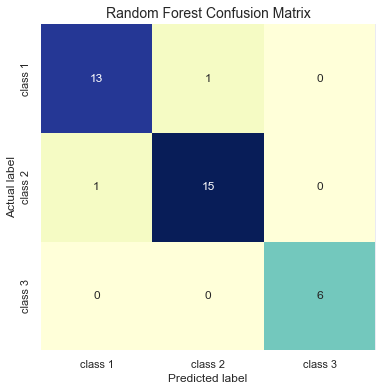

In [77]:
clf_cm = confusion_matrix(y_test, y_pred_clf_bp )

labels = ['class 1','class 2','class 3']
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(clf_cm), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Random Forest Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

+ Cada observación en el conjunto de prueba se representa exactamente en un cuadro.
+ Es una matriz de 3x3 porque hay 3 clases de respuestas.

### - Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [107]:
from sklearn.model_selection import cross_val_score
cv_dt = cross_val_score(dt_classifier, X, y, cv=5, scoring='f1_macro')
print("F1 for DT mean: {:.2f}, std: {:.2f}".format(cv_dt.mean(), cv_dt.std()) )

cv_svm = cross_val_score(svm, X, y, cv=5, scoring='f1_macro')
print("F1 for SVM mean: {:.2f}, std: {:.2f}".format(cv_svm.mean(), cv_svm.std()) )

cv_knn = cross_val_score(knn_classifier, X, y, cv=5, scoring='f1_macro')
print("F1 for KNN mean: {:.2f}, std: {:.2f}".format(cv_knn.mean(), cv_knn.std()) )

F1 for DT mean: 0.89, std: 0.04
F1 for SVM mean: 0.96, std: 0.04
F1 for KNN mean: 0.67, std: 0.05


In [110]:
print(cross_val_score(dt_classifier, X, y, cv=5, scoring='f1_macro'))
print(cross_val_score(svm, X, y, cv=5, scoring='f1_macro'))
print(cross_val_score(knn_classifier, X, y, cv=5, scoring='f1_macro'))

[0.94582471 0.82702483 0.89063714 0.91398745 0.86450742]
[0.88763285 0.94515263 0.97401299 1.         1.        ]
[0.71825397 0.64574511 0.62539683 0.62828283 0.73586207]


Cross- validation es una técnica comúnmente utilizada en aprendizaje automático y estadística para evaluar el rendimiento y la capacidad de generalización de un modelo de predicción.

### - Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

Antes de aplicar los modelos de clasificación , se han transformado algunas variables: 

+ A la variable probablemente Gaussiana, detectada a través del Test de Hipótesis, se le aplico Estandarización: que transforma los datos de tal manera que tengan una media igual a cero y una desviación estándar igual a uno.
+ A las variables probablemente no Gaussianassin outliers se les aplicó Normalización MinMax : que transforma los datos de tal manera que tengan un rango definido, generalmente entre 0 y 1.
+ A las variables probablemente no Gaussianas con outliers se les aplicó la técnica Robust que transforma los datos de tal manera que se eliminen los efectos de los valores atípicos y se garantice que los datos estén centrados en cero y tengan una varianza similar.
